In [1]:
%load_ext lab_black

In [2]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("../data/combined.csv").set_index("date")
basic = pd.read_csv("../data/basic_features.csv").set_index("date")
advanced = pd.read_csv("../data/advanced_features.csv").set_index("date")

In [4]:
full_numerical_data = pd.concat([data, basic, advanced], join="inner", axis=1)
full_numerical_data

,inflation_one_month,inflation_two_month,inflation_three_month,inflation_six_month,inflation_twelve_month,oil_reserves_algeria,oil_reserves_kuwait,oil_reserves_united_states,oil_reserves_middle_east_bp,oil_reserves_iran,...,oil_reserves_iran_smoothed,oil_reserves_vietnam_smoothed,oil_reserves_lower_middle_income_countries_smoothed,oil_reserves_nigeria_smoothed,oil_reserves_libya_smoothed,oil_reserves_congo_smoothed,opec_price_smoothed,wti_price_smoothed,brent_price_smoothed,gas_price_smoothed
date,,,,,,,,,,,,,,,,,,,,,
1994-03-28,0.5,1.0,1.2,1.9,2.9,1.254880e+09,1.316260e+10,4.226733e+09,9.026446e+10,1.266610e+10,...,1.266638e+10,5.090679e+07,1.926405e+10,2.892164e+09,3.106593e+09,9.970379e+07,14.581898,15.497525,14.406717,1.026407
1994-04-04,0.5,1.0,1.2,1.9,2.9,1.254880e+09,1.316260e+10,4.224248e+09,9.026648e+10,1.266610e+10,...,1.266639e+10,5.119078e+07,1.926528e+10,2.890678e+09,3.102347e+09,9.977294e+07,14.760769,15.408856,14.776587,1.020572
1994-04-11,0.1,0.6,1.0,1.6,2.8,1.254880e+09,1.316260e+10,4.221763e+09,9.026850e+10,1.266610e+10,...,1.266639e+10,5.147656e+07,1.926652e+10,2.901407e+09,3.110185e+09,9.984188e+07,14.491533,15.106556,14.617616,1.013435
1994-04-18,0.1,0.6,1.0,1.6,2.8,1.254880e+09,1.316260e+10,4.219278e+09,9.027053e+10,1.266610e+10,...,1.266640e+10,5.176063e+07,1.926775e+10,2.900372e+09,3.106922e+09,9.991107e+07,14.086759,14.202841,13.015352,1.022682
1994-04-25,0.1,0.6,1.0,1.6,2.8,1.254880e+09,1.316260e+10,4.216793e+09,9.027255e+10,1.266610e+10,...,1.266641e+10,5.204528e+07,1.926898e+10,2.902690e+09,3.106306e+09,9.998018e+07,14.150259,15.933686,14.031396,1.044330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.2,0.3,0.6,1.8,5.7,1.664080e+09,1.384460e+10,9.378455e+09,1.140136e+11,2.152392e+10,...,2.152425e+10,6.001268e+08,3.177584e+10,5.018295e+09,6.627938e+09,3.931019e+08,78.048971,73.223194,77.704994,3.266742
2023-01-02,0.2,0.3,0.6,1.8,5.7,1.664080e+09,1.384460e+10,9.378455e+09,1.140135e+11,2.152392e+10,...,2.152405e+10,6.001290e+08,3.177536e+10,5.036163e+09,6.616677e+09,3.931060e+08,77.447456,74.942097,80.574578,3.145804
2023-01-09,0.2,0.3,0.6,1.8,5.7,1.664080e+09,1.384460e+10,9.378455e+09,1.140134e+11,2.152392e+10,...,2.152425e+10,6.001262e+08,3.177514e+10,5.032281e+09,6.613993e+09,3.931055e+08,81.268532,76.812742,80.107295,3.156236


In [5]:
the_future = "2019-01-01"

scaler = StandardScaler()

scaler.fit(full_numerical_data.loc[:the_future])
scaled_data = scaler.transform(full_numerical_data)
scaled_data = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())
scaled_data["date"] = full_numerical_data.index
scaled_data = scaled_data.set_index("date")
scaled_data

,inflation_one_month,inflation_two_month,inflation_three_month,inflation_six_month,inflation_twelve_month,oil_reserves_algeria,oil_reserves_kuwait,oil_reserves_united_states,oil_reserves_middle_east_bp,oil_reserves_iran,...,oil_reserves_iran_smoothed,oil_reserves_vietnam_smoothed,oil_reserves_lower_middle_income_countries_smoothed,oil_reserves_nigeria_smoothed,oil_reserves_libya_smoothed,oil_reserves_congo_smoothed,opec_price_smoothed,wti_price_smoothed,brent_price_smoothed,gas_price_smoothed
date,,,,,,,,,,,,,,,,,,,,,
1994-03-28,1.809404,2.225218,1.938968,2.376548,1.593481,-2.615577,-1.123555,-0.438286,-1.468194,-1.244378,...,-1.242334,-1.760315,-1.466952,-1.568083,-1.829332,-1.957976,-1.161109,-1.218449,-1.161525,-1.337994
1994-04-04,1.809404,2.225218,1.938968,2.376548,1.593481,-2.615577,-1.123555,-0.440414,-1.467909,-1.244378,...,-1.242332,-1.758888,-1.466714,-1.569676,-1.832867,-1.957124,-1.155574,-1.221416,-1.150536,-1.344469
1994-04-11,-0.403992,0.868685,1.367226,1.539100,1.388978,-2.615577,-1.123555,-0.442543,-1.467624,-1.244378,...,-1.242330,-1.757451,-1.466472,-1.558173,-1.826343,-1.956275,-1.163906,-1.231532,-1.155259,-1.352389
1994-04-18,-0.403992,0.868685,1.367226,1.539100,1.388978,-2.615577,-1.123555,-0.444671,-1.467338,-1.244378,...,-1.242328,-1.756024,-1.466234,-1.559283,-1.829058,-1.955422,-1.176432,-1.261775,-1.202861,-1.342127
1994-04-25,-0.403992,0.868685,1.367226,1.539100,1.388978,-2.615577,-1.123555,-0.446800,-1.467053,-1.244378,...,-1.242326,-1.754593,-1.465995,-1.556797,-1.829572,-1.954571,-1.174467,-1.203853,-1.172675,-1.318103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.149357,-0.148715,0.223744,2.097398,7.319573,0.706580,0.867105,3.974179,1.882801,1.163237,...,1.164972,0.999856,0.960631,0.711503,1.101863,1.656825,0.802990,0.713315,0.718998,1.148324
2023-01-02,0.149357,-0.148715,0.223744,2.097398,7.319573,0.706580,0.867105,3.974179,1.882776,1.163237,...,1.164918,0.999867,0.960537,0.730661,1.092488,1.656876,0.784375,0.770837,0.804250,1.014107
2023-01-09,0.149357,-0.148715,0.223744,2.097398,7.319573,0.706580,0.867105,3.974179,1.882762,1.163237,...,1.164971,0.999853,0.960494,0.726499,1.090254,1.656871,0.902625,0.833438,0.790368,1.025685


Text(0, 0.5, 'Fraction of Total Dataset Variance')

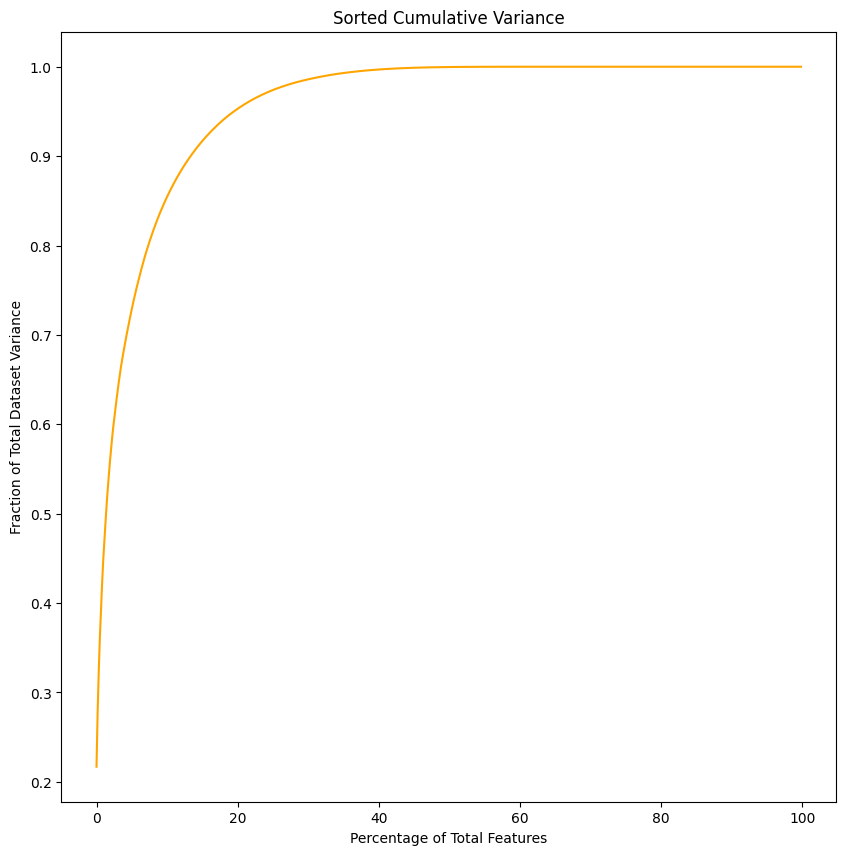

In [6]:
target = "gas_price"
features = [col for col in scaled_data if col != target]

X = scaled_data[features].loc[:the_future].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    corr = np.nan_to_num(np.corrcoef(X, rowvar=False))

e_val, e_vec = np.linalg.eigh(corr)

# get number of entries and sorter for eigenvalue magnitudes
dim = e_val.shape[0]
sorter = np.argsort(np.abs(e_val))[::-1]

x_percentages = np.array([100.0 * n / dim for n in range(dim)])
tick_indices = [np.argmin(np.abs(x_percentages - n)) for n in range(0, 101, 10)]
x_labels = []
p = 0
for i in range(dim):
    if i in tick_indices:
        x_labels.append(str(p))
        p += 10
    else:
        x_labels.append("")
    if p > 100:
        break


cumvar = np.cumsum(e_val[sorter]) / np.sum(e_val)
ax.plot(x_percentages, cumvar, color="orange")
ax.set_title("Sorted Cumulative Variance")
ax.set_xlabel("Percentage of Total Features")
ax.set_ylabel("Fraction of Total Dataset Variance")

In [7]:
five_out = int(0.05 * len(features))
ten_out = int(0.1 * len(features))
twenty_out = int(0.2 * len(features))

kpca5 = KernelPCA(n_components=five_out)
kpca5.fit(scaled_data[features].loc[:the_future])
five_features = kpca5.transform(scaled_data[features])

kpca10 = KernelPCA(n_components=ten_out)
kpca10.fit(scaled_data[features].loc[:the_future])
ten_features = kpca10.transform(scaled_data[features])

kpca20 = KernelPCA(n_components=twenty_out)
kpca20.fit(scaled_data[features].loc[:the_future])
twenty_features = kpca20.transform(scaled_data[features])

In [8]:
five_data = np.append(five_features, scaled_data[[target]].values, axis=1)
ten_data = np.append(ten_features, scaled_data[[target]].values, axis=1)
twenty_data = np.append(twenty_features, scaled_data[[target]].values, axis=1)

In [9]:
def reduced_data_writer(reduced, target_name, path, dates):
    df = pd.DataFrame(
        reduced,
        columns=[f"zeta_{n}" for n in range(reduced.shape[1] - 1)] + [target_name],
    )

    df["date"] = dates
    df = df.set_index("date")

    df.to_csv(path)

    return


reduced_data_writer(
    five_data, "gas_price", "../data/five_percent.csv", scaled_data.index
)
reduced_data_writer(ten_data, "gas_price", "../data/ten_percent.csv", scaled_data.index)
reduced_data_writer(
    twenty_data, "gas_price", "../data/twenty_percent.csv", scaled_data.index
)